In [6]:
%load_ext autoreload
%autoreload 2

# Interactive plots
%matplotlib notebook

import pandas as pd
import numpy as np
import scipy.signal
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import mypackage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# This is a matlab read of "converted_20200213_FM_fillet_repeat_sample_B_33.ics"
# X = mypackage.Dataset.read_image()
file_list = ['20200213_120111_FM_fillet_repeat_sample_B_33']
X, Y, info = mypackage.Dataset.load_files(file_list, "../data/tomra", only_one_contaminant_type=False)
X, Y = X[0], Y[0]
# The spectraband indexes
index = np.array([928, 932, 935, 939, 942, 946, 950, 953, 957, 960, 964, 968, 971, 975, 978, 982, 986, 989, 993, 997, 1000, 1004, 1007, 1011, 1015, 1018, 1022, 1025, 1029, 1033, 1036, 1040, 1043, 1047, 1051, 1054, 1058, 1061, 1065, 1069, 1072, 1076, 1079, 1083, 1087, 1090, 1094, 1097, 1101, 1105, 1108, 1112, 1115, 1119, 1123, 1126, 1130, 1134, 1137, 1141, 1144, 1148, 1152, 1155, 1159, 1162, 1166, 1170, 1173, 1177, 1180, 1184, 1188, 1191, 1195, 1198, 1202, 1206, 1209, 1213, 1216, 1220, 1224, 1227, 1231, 1234, 1238, 1242, 1245, 1249, 1252, 1256, 1260, 1263, 1267, 1271, 1274, 1278, 1281, 1285, 1289, 1292, 1296, 1299, 1303, 1307, 1310, 1314, 1317, 1321, 1325, 1328, 1332, 1335, 1339, 1343, 1346, 1350, 1353, 1357, 1361, 1364, 1368, 1371, 1375, 1379, 1382, 1386, 1390, 1393, 1397, 1400, 1404, 1408, 1411, 1415, 1418, 1422, 1426, 1429, 1433, 1436, 1440, 1444, 1447, 1451, 1454, 1458, 1462, 1465, 1469, 1472, 1476, 1480, 1483, 1487, 1490, 1494, 1498, 1501, 1505, 1508, 1512, 1516, 1519, 1523, 1527, 1530, 1534, 1537, 1541, 1545, 1548, 1552, 1555, 1559, 1563, 1566, 1570, 1573, 1577, 1581, 1584, 1588, 1591, 1595, 1599, 1602, 1606, 1609, 1613, 1617, 1620, 1624, 1627, 1631, 1635, 1638, 1642, 1645, 1649, 1653, 1656, 1660, 1664, 1667, 1671, 1674])

X.shape, Y.shape

((100, 100, 208), (100, 100, 1))

In [8]:
help(mypackage.Dataset._Dataset__add_legend_to_image)

Help on function __add_legend_to_image in module mypackage.data:

__add_legend_to_image(y, img, legend=None)



<IPython.core.display.Javascript object>


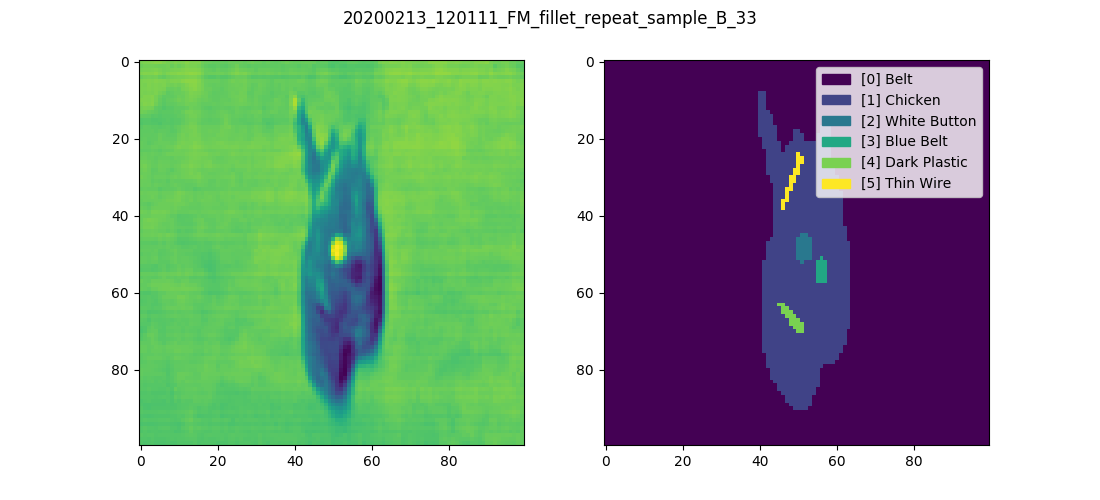

In [9]:
plt.figure(figsize=(11,5))
plt.suptitle(file_list[0])
plt.subplot(121)
plt.imshow(X[:, :, 50])

plt.subplot(122)
img = plt.imshow(np.squeeze(Y))

mypackage.Dataset._Dataset__add_legend_to_image(np.squeeze(Y), img, ['Belt', 'Chicken', 'White Button', 'Blue Belt', 'Dark Plastic', 'Thin Wire'])

<IPython.core.display.Javascript object>


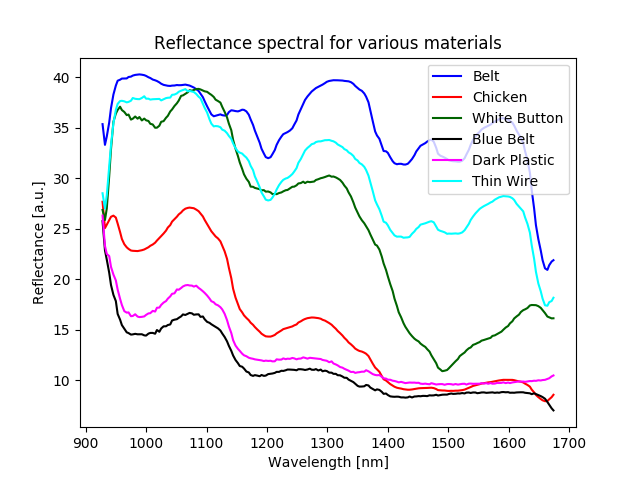

Text(0.5, 0, 'Wavelength [nm]')

In [25]:
def plot_each_item_spectra(x, y, labels=[], title=None):
    colors = ['Blue', 'Red', 'DarkGreen', 'Black', 'Magenta', 'Cyan', 'Yellow', 'White', 'DarkBlue']
    
    def add_all_pixels_to_plot(data, color='r', label=None):
        plt.plot(index, np.mean(data, axis=0), color=color, label=label)
        
    get_label = lambda i: labels[i] if len(labels) > 0 else None

    fig = plt.figure()
    plt.title(title)
    for i, item in enumerate(np.unique(y)):
        add_all_pixels_to_plot(x[np.squeeze(y == item)], color=colors[i], label=get_label(i))

    plt.legend()
    ax = fig.axes[0]
#     ax.legend([Line2D([0], [0], color='Red', lw=4),
#                Line2D([0], [0], color='Blue', lw=4),
#                Line2D([0], [0], color='Green', lw=4)], ['Button', 'Blue belt', 'Dark meat']);
    return fig, ax
    
plot_each_item_spectra(X, Y, labels=['Belt', 'Chicken', 'White Button', 'Blue Belt', 'Dark Plastic', 'Thin Wire'])
plt.title("Reflectance spectral for various materials")
plt.ylabel("Reflectance [a.u.]")
plt.xlabel("Wavelength [nm]")

<IPython.core.display.Javascript object>


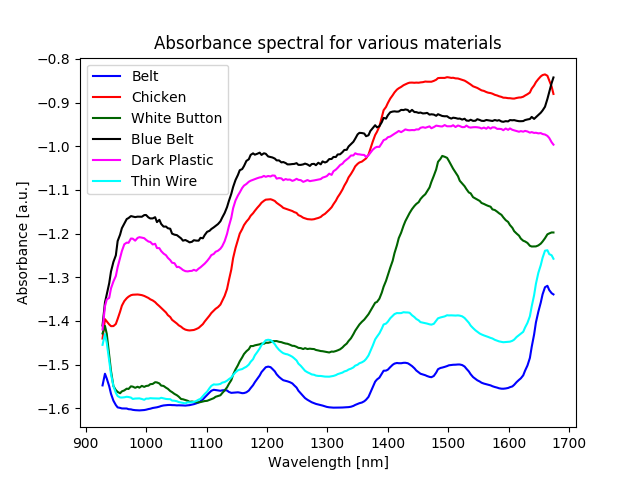

Text(0.5, 0, 'Wavelength [nm]')

In [24]:
X_absorb = np.log10(1/X)
fig, ax = plot_each_item_spectra(X_absorb, Y, ['Belt', 'Chicken', 'White Button', 'Blue Belt', 'Dark Plastic', 'Thin Wire'])
plt.title("Absorbance spectral for various materials")
plt.ylabel("Absorbance [a.u.]")
plt.xlabel("Wavelength [nm]")

### Testing out with first and second derivative

In [35]:
w, p = 21, 6
diff_1st = lambda x: scipy.signal.savgol_filter(x, window_length=w, polyorder=p, deriv=1)
diff_2nd = lambda x: scipy.signal.savgol_filter(x, window_length=w, polyorder=p, deriv=2)

<IPython.core.display.Javascript object>


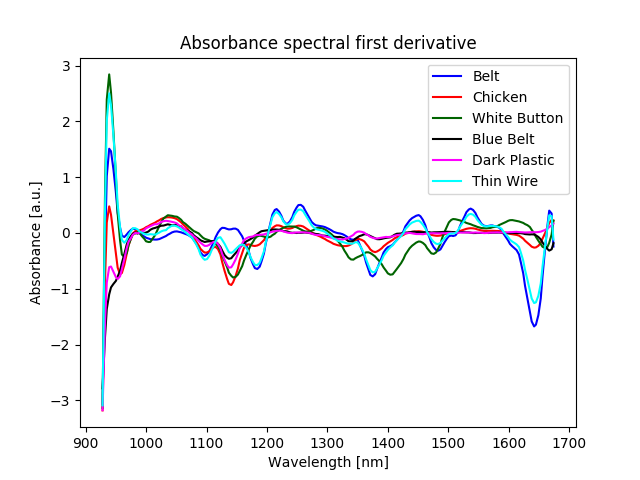

Text(0.5, 0, 'Wavelength [nm]')

In [36]:
X_absorb_diff1 = diff_1st(X)
fig, ax = plot_each_item_spectra(X_absorb_diff1, Y, ['Belt', 'Chicken', 'White Button', 'Blue Belt', 'Dark Plastic', 'Thin Wire'])
plt.title("Absorbance spectral first derivative")
plt.ylabel("Absorbance [a.u.]")
plt.xlabel("Wavelength [nm]")

<IPython.core.display.Javascript object>


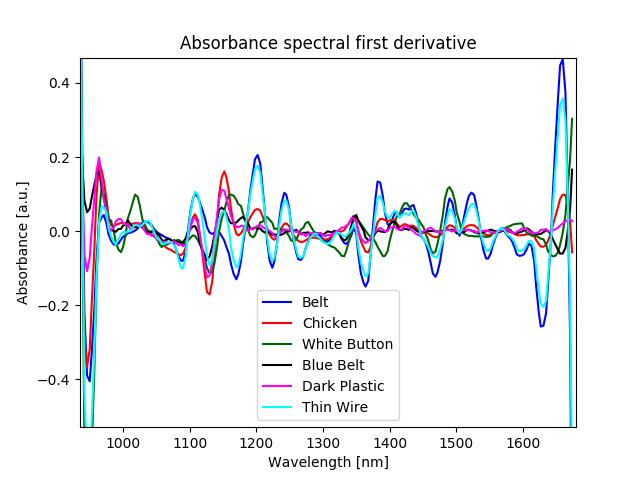

Text(0.5, 0, 'Wavelength [nm]')

In [38]:
X_absorb_diff2 = diff_2nd(X)
fig, ax = plot_each_item_spectra(X_absorb_diff2, Y, ['Belt', 'Chicken', 'White Button', 'Blue Belt', 'Dark Plastic', 'Thin Wire'])
plt.title("Absorbance spectral first derivative")
plt.ylabel("Absorbance [a.u.]")
plt.xlabel("Wavelength [nm]")